In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [4]:
path=r'train_ctrUa4K (2).csv'
loan_data=pd.read_csv("train_ctrUa4K (2).csv")
loan_df=loan_data.drop("Loan_ID",axis=1)
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**check the nullvalues**

In [5]:
loan_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**seperating two columns: categorical_columns and Numerical_columns**

In [9]:
cat_col=loan_df.select_dtypes(include="object").columns
cat_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
num_col=loan_df.select_dtypes(exclude="object").columns
num_col

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [13]:
mode=loan_df['Gender'].mode()

loan_df['Gender']=loan_df['Gender'].fillna(mode[0])

In [15]:
for i in cat_col:
    mode=loan_df[i].mode()
    loan_df[i]=loan_df[i].fillna(mode[0])

In [17]:
for i in num_col:
    median=loan_df[i].median()
    loan_df[i]=loan_df[i].fillna(median)

In [19]:
loan_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**outliers**

In [22]:
num_col

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

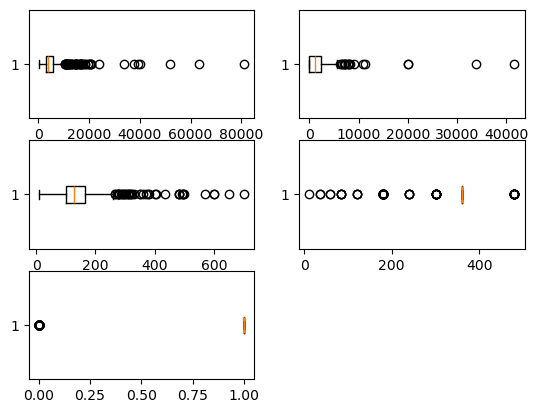

In [24]:

for i in range(len(num_col)):
    plt.subplot(3,2,i+1)
    plt.boxplot(x=num_col[i],data=loan_df,vert=False)

**filling the outliers**

In [26]:
# ap=loan_df['ApplicantIncome']
# q1=np.percentile(ap,25)
# q3=np.percentile(ap,75)
# IQR=q3-q1
# LB=q1-1.5*IQR
# ub=q3+1.5*IQR
# con1=loan_df['ApplicantIncome']<LB
# con2=loan_df['ApplicantIncome']>ub
# con3=con1|con2
# med=ap.median()
# loan_df['ApplicantIncome']=np.where(con3,med,ap)
# plt.boxplot(loan_df['ApplicantIncome']);

for i in num_col:
    ap=loan_df[i]
    q1=np.percentile(ap,25)
    q3=np.percentile(ap,75)
    IQR=q3-q1
    LB=q1-1.5*IQR
    ub=q3+1.5*IQR
    con1=loan_df[i]<LB
    con2=loan_df[i]>ub
    con3=con1|con2
    med=ap.median()
    loan_df[i]=np.where(con3,med,ap)
    
    

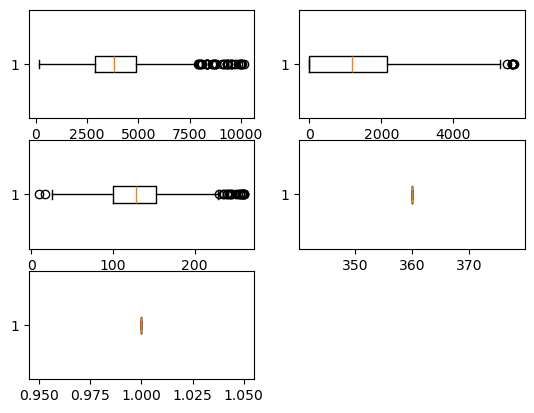

In [29]:
for i in range(len(num_col)):
    plt.subplot(3,2,i+1)
    plt.boxplot(x=num_col[i],data=loan_df,vert=False)

**Encoding**

In [31]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
# loan_df['Gender']
# lb.fit_transform(loan_df['Gender'])
for i in cat_col:
    loan_df[i]=lb.fit_transform(loan_df[i])

In [33]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


<Axes: >

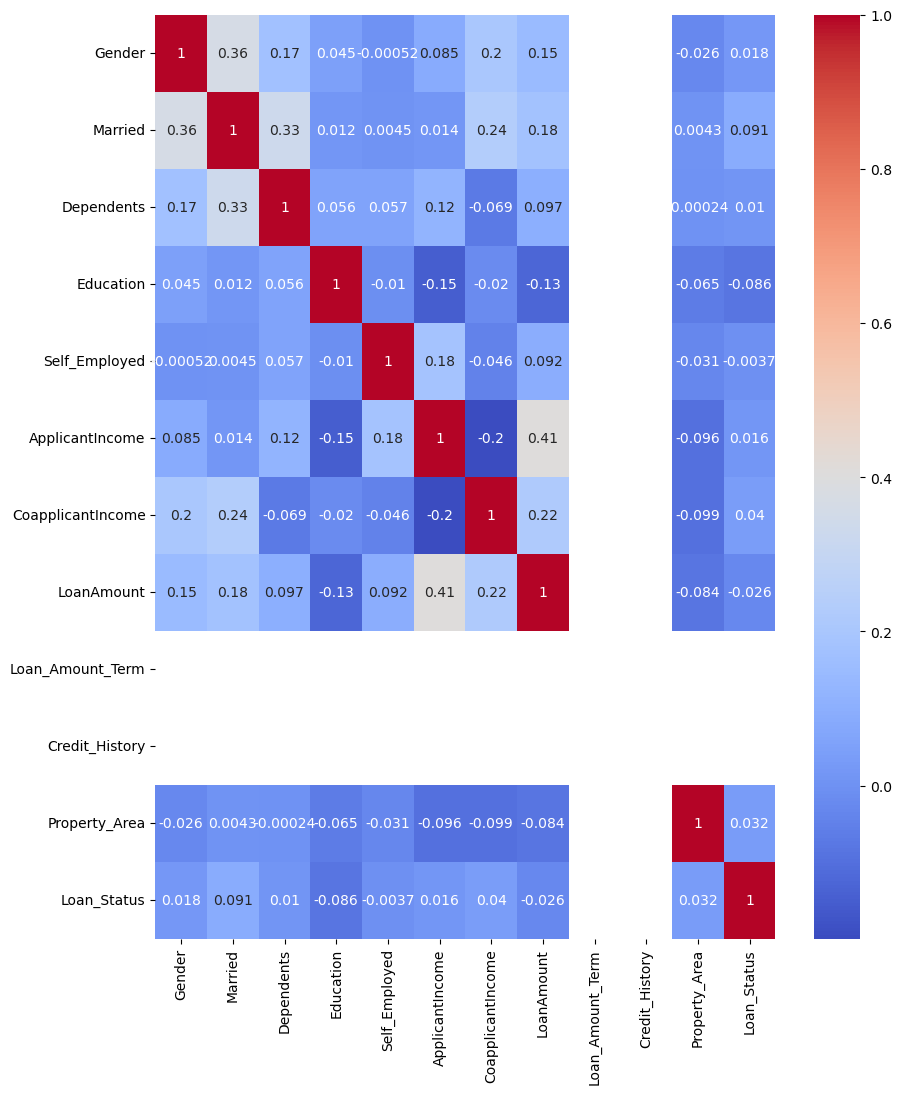

In [35]:
plt.figure(figsize=(10,12))
co_mat=loan_df.corr()
sns.heatmap(co_mat,annot=True,cmap='coolwarm')

In [36]:
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import  variance_inflation_factor
X=loan_df.drop("Loan_Status",axis=1)
df=pd.DataFrame()

df['features']=X.columns
df['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
df

,features,vif
0,Gender,1.199339
1,Married,1.341644
2,Dependents,1.178931
3,Education,1.048731
4,Self_Employed,1.036825
5,ApplicantIncome,1.426520
6,CoapplicantIncome,1.294507
7,LoanAmount,1.384091
8,Loan_Amount_Term,0.000000
9,Credit_History,0.000000


**scaling the data**


In [38]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_data=ss.fit_transform(loan_df.drop("Loan_Status",axis=1))
scaled_data

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.        ,
         0.        ,  1.22329839],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.        ,
         0.        , -1.31851281],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.        ,
         0.        ,  1.22329839],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.        ,
         0.        ,  1.22329839],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.        ,
         0.        ,  1.22329839],
       [-2.11710719, -1.37208932, -0.73780632, ...,  0.        ,
         0.        , -0.04760721]])

In [42]:
scaled_df=pd.DataFrame()
scaled_df[X.columns]=scaled_data
scaled_df['Loan_Status']=loan_df['Loan_Status']
scaled_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.947218,-0.893781,-0.010078,0.0,0.0,1.223298,1
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.261857,0.154146,-0.010078,0.0,0.0,-1.318513,0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.595116,-0.893781,-1.395146,0.0,0.0,1.223298,1
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.820863,0.744821,-0.188797,0.0,0.0,1.223298,1
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,1.028964,-0.893781,0.280339,0.0,0.0,1.223298,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.649252,-0.893781,-1.283447,0.0,0.0,-1.318513,1
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,0.003628,-0.893781,-1.975981,0.0,0.0,-1.318513,1
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,2.150661,-0.727002,2.782397,0.0,0.0,1.223298,1
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,1.885936,-0.893781,1.307970,0.0,0.0,1.223298,1


**seperate the X and y columns**

In [45]:
X=scaled_df.drop('Loan_Status',axis=1)
y=scaled_df['Loan_Status']
X.shape

(614, 11)

**splitting the data**

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((491, 11), (123, 11), (491,), (123,))

**Model Development**

**With out hyperparamter**

accuracy_score is : 0.6829268292682927
recall_score is: 0.9880952380952381
f1_score is: 0.8097560975609757
precision_score is: 0.6859504132231405


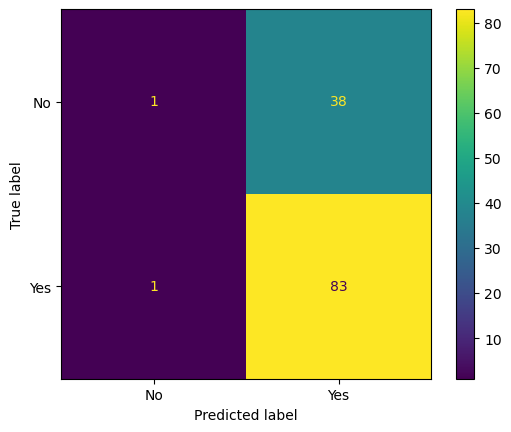

,Logistic_regression
Accuracy,0.682927
Recall,0.988095
f1score,0.809756
precisionscore,0.685950


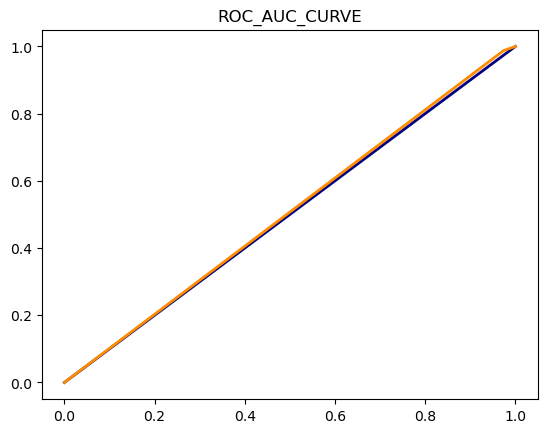

In [52]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg

####################################################___fit the data
lg_model=lg.fit(X_train,y_train)
lg_model
####################################################_prediction
y_pred=lg_model.predict(X_test)
####################################################____metrics
from sklearn.metrics import recall_score,f1_score,\
                           precision_score,accuracy_score,\
                           roc_auc_score,auc,confusion_matrix,\
                           ConfusionMatrixDisplay,roc_curve

ac=accuracy_score(y_test,y_pred)
re=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
pr=precision_score(y_test,y_pred)
print("accuracy_score is :",ac)
print("recall_score is:",re)
print("f1_score is:",f1)
print("precision_score is:",pr)
##############################################____confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=['No','Yes'])
cmd.plot()
plt.show()
#############################################_Roc_Aoc_curve
fpr, tpr, thresholds=roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1],lw=2,color='navy',label="Random model")
plt.plot(fpr,tpr,lw=2,color='darkorange',label="Logistic_Model")
plt.title("ROC_AUC_CURVE")
############################################__accuracy
auc(fpr,tpr)
#########################################################_____dataframe
lg=[ac,re,f1,pr]
lg_df=pd.DataFrame(lg,index=['Accuracy','Recall','f1score','precisionscore'],columns=['Logistic_regression'])
lg_df

**Decision_Tree**

accuracy_score is : 0.5772357723577236
recall_score is: 0.7023809523809523
f1_score is: 0.6941176470588235
precision_score is: 0.686046511627907


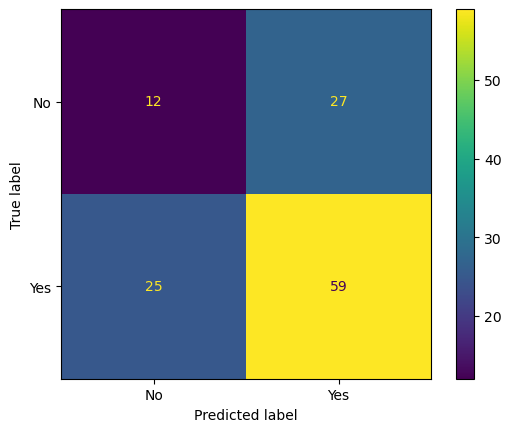

,Decision_Tree
Accuracy,0.577236
Recall,0.702381
f1score,0.694118
precisionscore,0.686047


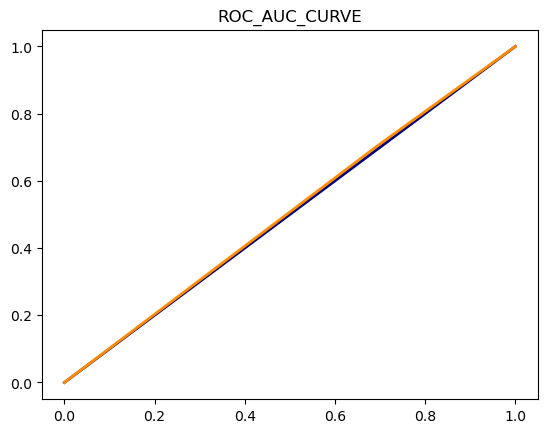

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt

####################################################___fit the data
dt_model=dt.fit(X_train,y_train)
dt_model
####################################################_prediction
y_pred=dt_model.predict(X_test)
####################################################____metrics
from sklearn.metrics import recall_score,f1_score,\
                           precision_score,accuracy_score,\
                           roc_auc_score,auc,confusion_matrix,\
                           ConfusionMatrixDisplay,roc_curve

ac=accuracy_score(y_test,y_pred)
re=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
pr=precision_score(y_test,y_pred)
print("accuracy_score is :",ac)
print("recall_score is:",re)
print("f1_score is:",f1)
print("precision_score is:",pr)
##############################################____confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=['No','Yes'])
cmd.plot()
plt.show()
#############################################_Roc_Aoc_curve
fpr, tpr, thresholds=roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1],lw=2,color='navy',label="Random model")
plt.plot(fpr,tpr,lw=2,color='darkorange',label="DecisonTree")
plt.title("ROC_AUC_CURVE")
############################################__accuracy
auc(fpr,tpr)
######################################################_dataframe
dt=[ac,re,f1,pr]
dt_df=pd.DataFrame(dt,index=['Accuracy','Recall','f1score','precisionscore'],columns=['Decision_Tree'])
dt_df

**KNNmodel**

accuracy_score is : 0.6422764227642277
recall_score is: 0.8690476190476191
f1_score is: 0.7684210526315789
precision_score is: 0.6886792452830188


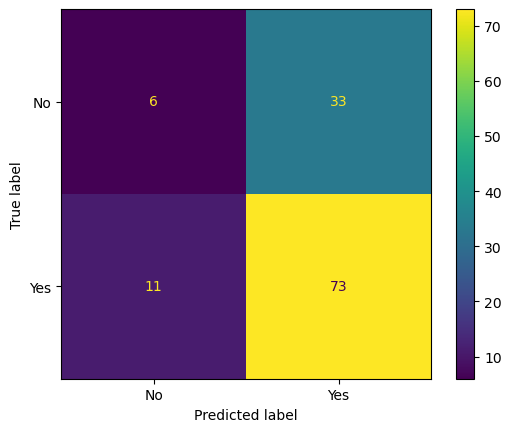

,KNN
Accuracy,0.642276
Recall,0.869048
f1score,0.768421
precisionscore,0.688679


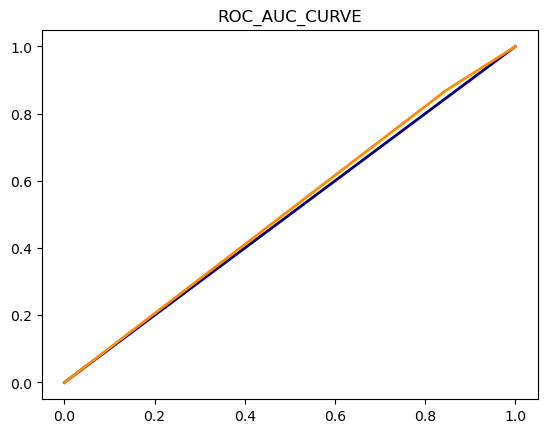

In [57]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn

####################################################___fit the data
kn_model=kn.fit(X_train,y_train)
kn_model
####################################################_prediction
y_pred=kn_model.predict(X_test)
####################################################____metrics
from sklearn.metrics import recall_score,f1_score,\
                           precision_score,accuracy_score,\
                           roc_auc_score,auc,confusion_matrix,\
                           ConfusionMatrixDisplay,roc_curve

ac=accuracy_score(y_test,y_pred)
re=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
pr=precision_score(y_test,y_pred)
print("accuracy_score is :",ac)
print("recall_score is:",re)
print("f1_score is:",f1)
print("precision_score is:",pr)
##############################################____confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=['No','Yes'])
cmd.plot()
plt.show()
#############################################_Roc_Aoc_curve
fpr, tpr, thresholds=roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1],lw=2,color='navy',label="Random model")
plt.plot(fpr,tpr,lw=2,color='darkorange',label="KNN")
plt.title("ROC_AUC_CURVE")
############################################__accuracy
auc(fpr,tpr)
##################################################_dataframe
kn=[ac,re,f1,pr]
kn_df=pd.DataFrame(kn,index=['Accuracy','Recall','f1score','precisionscore'],columns=['KNN'])
kn_df

**Navie Byes**

accuracy_score is : 0.6504065040650406
recall_score is: 0.9404761904761905
f1_score is: 0.7860696517412935
precision_score is: 0.6752136752136753


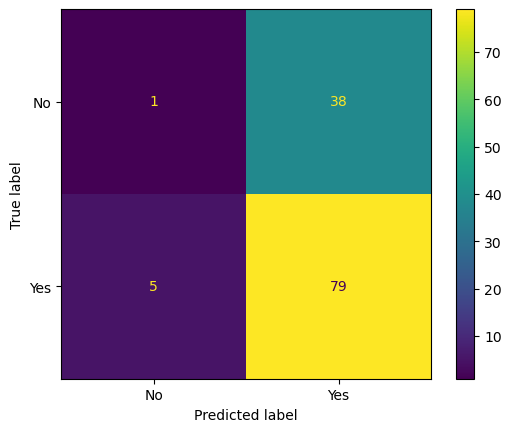

,Navie Byes
Accuracy,0.650407
Recall,0.940476
f1score,0.786070
precisionscore,0.675214


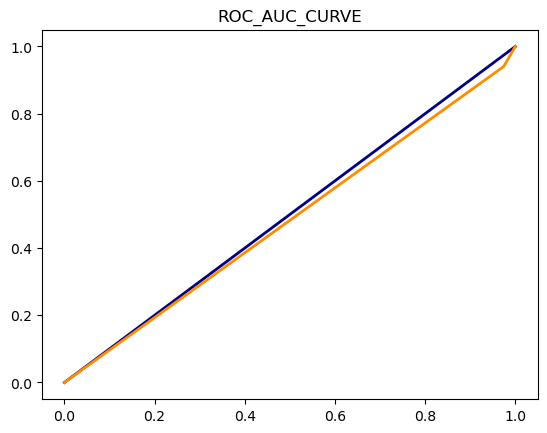

In [60]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb

####################################################___fit the data
nb_model=nb.fit(X_train,y_train)
nb_model
####################################################_prediction
y_pred=nb_model.predict(X_test)
####################################################____metrics
from sklearn.metrics import recall_score,f1_score,\
                           precision_score,accuracy_score,\
                           roc_auc_score,auc,confusion_matrix,\
                           ConfusionMatrixDisplay,roc_curve

ac=accuracy_score(y_test,y_pred)
re=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
pr=precision_score(y_test,y_pred)
print("accuracy_score is :",ac)
print("recall_score is:",re)
print("f1_score is:",f1)
print("precision_score is:",pr)
##############################################____confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=['No','Yes'])
cmd.plot()
plt.show()
#############################################_Roc_Aoc_curve
fpr, tpr, thresholds=roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1],lw=2,color='navy',label="Random model")
plt.plot(fpr,tpr,lw=2,color='darkorange',label="NavieByes")
plt.title("ROC_AUC_CURVE")
############################################__accuracy
auc(fpr,tpr)
############################################_dataframe
nb=[ac,re,f1,pr]
nb_df=pd.DataFrame(nb,index=['Accuracy','Recall','f1score','precisionscore'],columns=['Navie Byes'])
nb_df

In [61]:
import pandas as pd
without_hyper_df=pd.concat([lg_df,dt_df,kn_df,nb_df],axis=1)
without_hyper_df

,Logistic_regression,Decision_Tree,KNN,Navie Byes
Accuracy,0.682927,0.577236,0.642276,0.650407
Recall,0.988095,0.702381,0.869048,0.940476
f1score,0.809756,0.694118,0.768421,0.786070
precisionscore,0.685950,0.686047,0.688679,0.675214


**Hyperparameter**

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Total time is taken:13.846325397491455
the accuracr is 0.6910569105691057
the f1_score is 0.8155339805825242
the recall is 1.0
the precision_score is 0.6885245901639344


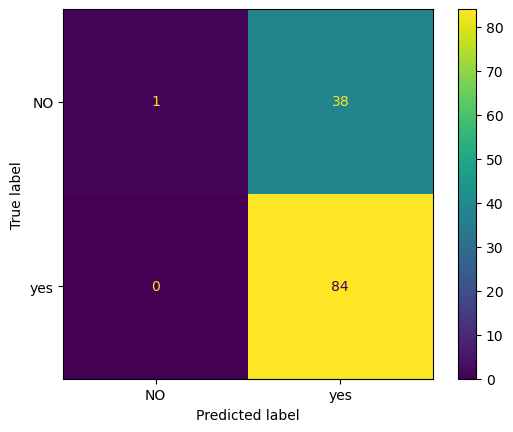

,Decision Tree
accuracy,0.691057
f1_score,0.815534
recall_score,1.000000
precisionscore,0.688525


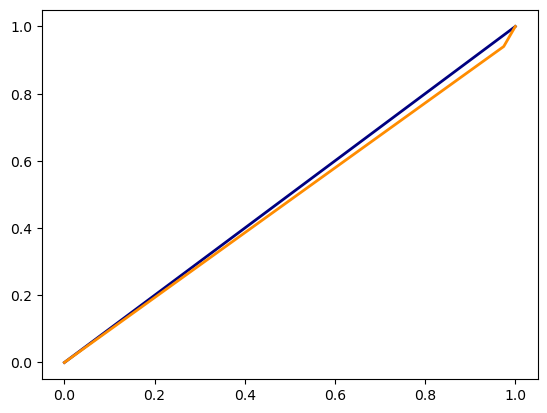

In [64]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
grid_tree=DecisionTreeClassifier()
grid_tree         
#########################################################################params
param_grid = {
    'max_depth': [5, 10, 15, 20,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto','sqrt' ,'log2']}   
#############################################################################_gridsearch
grid_search=GridSearchCV(grid_tree,                      
                        param_grid,scoring='accuracy',
                         cv=5,                          
                        verbose=True)
grid_search
#################################################################_model_development_withtime_taken
import warnings
warnings.filterwarnings('ignore')
import time
start = time.time()
model=grid_search.fit(X_train, y_train)
end=time.time()
print(f"Total time is taken:{end-start}")
##########################################################################_best_estimator
best_model=model.best_estimator_
best_model
############################################################################_best_params
model.best_params_
######################################################################_results
grid_search.cv_results_
######################################################################_prediction
y_pred=best_model.predict(X_test)
len(y_pred),len(y_test)  
########################################################################_metrics table
from sklearn.metrics import recall_score,f1_score,precision_score,\
                            accuracy_score,\
                            roc_auc_score,auc,confusion_matrix,ConfusionMatrixDisplay,roc_curve
######################################################################################
ac=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
re=recall_score(y_test,y_pred)
pr=precision_score(y_test,y_pred)

print(f'the accuracr is {ac}')
print(f'the f1_score is {f1}')
print(f'the recall is {re}')
print(f'the precision_score is {pr}')
##########################################################_____Confusion_matrix
cm=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(cm,display_labels=['NO','yes'])
dis.plot()
plt.show()
######################################################################_roc_curve
roc_auc_score(y_test,y_pred)
plt.plot([0,1],[0,1],lw=2,color='navy',label="Random model")
plt.plot(fpr,tpr,lw=2,color='darkorange',label="DecisionTree ")
###########################################################dataframe
import pandas as pd
dt=[ac,f1,re,pr]
det_df=pd.DataFrame(dt,index=['accuracy','f1_score','recall_score','precisionscore'],columns=['Decision Tree'])
det_df

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Total time is taken:13.501150369644165
the accuracr is 0.6829268292682927
the f1_score is 0.8115942028985508
the recall is 1.0
the precision_score is 0.6829268292682927


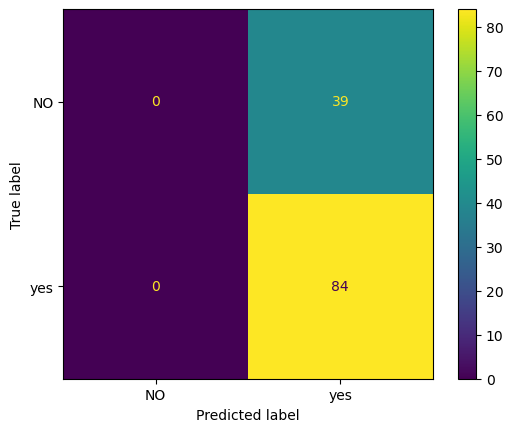

,LogisticRegression
accuracy,0.682927
f1_score,0.811594
recall_score,1.000000
precisionscore,0.682927


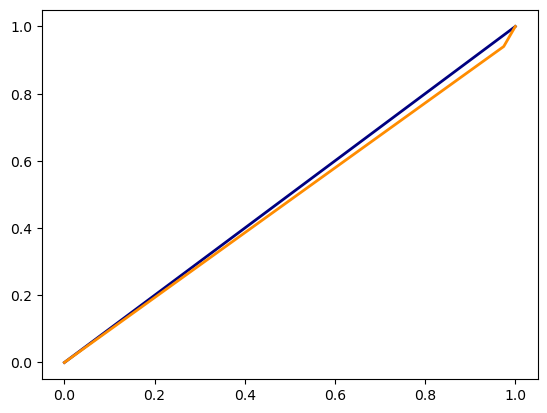

In [65]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
lo_re=LogisticRegression()
lo_re        
#########################################################################params
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': ['balanced', None]
}  
#############################################################################_gridsearch
grid_search=GridSearchCV(lo_re,                      
                        param_grid,scoring='accuracy',
                         cv=5,                          
                        verbose=True)
grid_search
#################################################################_model_development_withtime_taken
import warnings
warnings.filterwarnings('ignore')
import time
start = time.time()
model=grid_search.fit(X_train, y_train)
end=time.time()
print(f"Total time is taken:{end-start}")
##########################################################################_best_estimator
best_model=model.best_estimator_
best_model
############################################################################_best_params
model.best_params_
######################################################################_results
grid_search.cv_results_
######################################################################_prediction
y_pred=best_model.predict(X_test)
len(y_pred),len(y_test)  
########################################################################_metrics table
from sklearn.metrics import recall_score,f1_score,precision_score,\
                            accuracy_score,\
                            roc_auc_score,auc,confusion_matrix,ConfusionMatrixDisplay,roc_curve
######################################################################################
ac=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
re=recall_score(y_test,y_pred)
pr=precision_score(y_test,y_pred)

print(f'the accuracr is {ac}')
print(f'the f1_score is {f1}')
print(f'the recall is {re}')
print(f'the precision_score is {pr}')
##########################################################_____Confusion_matrix
cm=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(cm,display_labels=['NO','yes'])
dis.plot()
plt.show()
######################################################################_roc_curve
roc_auc_score(y_test,y_pred)
plt.plot([0,1],[0,1],lw=2,color='navy',label="Random model")
plt.plot(fpr,tpr,lw=2,color='darkorange',label="LogisticRegression ")
###########################################################dataframe
import pandas as pd
lg=[ac,f1,re,pr]
lgre_df=pd.DataFrame(lg,index=['accuracy','f1_score','recall_score','precisionscore'],columns=['LogisticRegression'])
lgre_df

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Total time is taken:30.002295970916748
the accuracr is 0.6666666666666666
the f1_score is 0.7918781725888325
the recall is 0.9285714285714286
the precision_score is 0.6902654867256637


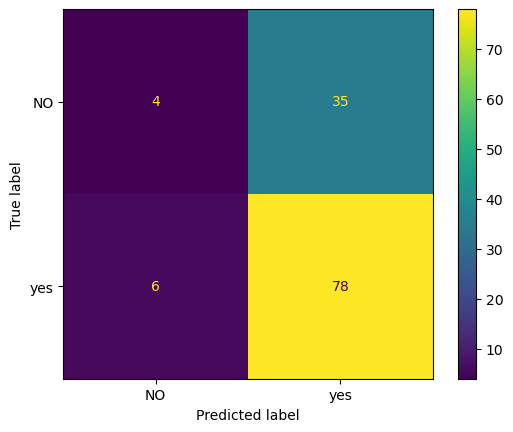

NameError: name 'knn_df' is not defined

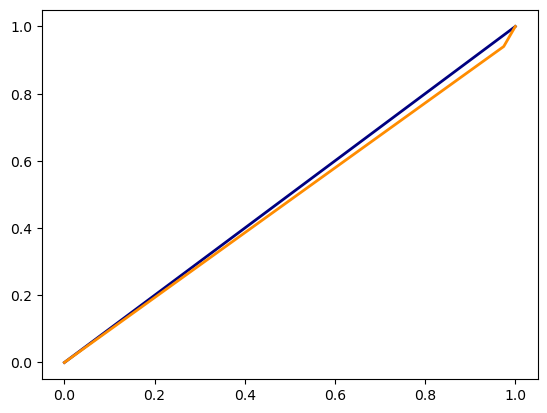

In [68]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
kn_bo=KNeighborsClassifier()
kn_bo       
#########################################################################params
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': [20, 30, 40],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}
#############################################################################_gridsearch
grid_search=GridSearchCV(kn_bo,                      
                        param_grid,scoring='accuracy',
                         cv=5,                          
                        verbose=True)
grid_search
#################################################################_model_development_withtime_taken
import warnings
warnings.filterwarnings('ignore')
import time
start = time.time()
model=grid_search.fit(X_train, y_train)
end=time.time()
print(f"Total time is taken:{end-start}")
##########################################################################_best_estimator
best_model=model.best_estimator_
best_model
############################################################################_best_params
model.best_params_
######################################################################_results
grid_search.cv_results_
######################################################################_prediction
y_pred=best_model.predict(X_test)
len(y_pred),len(y_test)  
########################################################################_metrics table
from sklearn.metrics import recall_score,f1_score,precision_score,\
                            accuracy_score,\
                            roc_auc_score,auc,confusion_matrix,ConfusionMatrixDisplay,roc_curve
######################################################################################
ac=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
re=recall_score(y_test,y_pred)
pr=precision_score(y_test,y_pred)

print(f'the accuracr is {ac}')
print(f'the f1_score is {f1}')
print(f'the recall is {re}')
print(f'the precision_score is {pr}')
##########################################################_____Confusion_matrix
cm=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(cm,display_labels=['NO','yes'])
dis.plot()
plt.show()
######################################################################_roc_curve
roc_auc_score(y_test,y_pred)
plt.plot([0,1],[0,1],lw=2,color='navy',label="Random model")
plt.plot(fpr,tpr,lw=2,color='darkorange',label="KNNeighbors ")
###########################################################dataframe
import pandas as pd
knb=[ac,f1,re,pr]
knb_df=pd.DataFrame(knb,index=['accuracy','f1_score','recall_score','precisionscore'],columns=['KNNeighbors'])
knn_df

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
nv_be=GaussianNB()
nv_be
      
#########################################################################param
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],  # for GaussianNB, controls variance smoothing
}
#############################################################################_gridsearch
grid_search=GridSearchCV(nv_be,                      
                        param_grid,scoring='accuracy',
                         cv=5,                          
                        verbose=True)
grid_search
#################################################################_model_development_withtime_taken
import warnings
warnings.filterwarnings('ignore')
import time
start = time.time()
model=grid_search.fit(X_train, y_train)
end=time.time()
print(f"Total time is taken:{end-start}")
##########################################################################_best_estimator
best_model=model.best_estimator_
best_model
############################################################################_best_params
model.best_params_
######################################################################_results
grid_search.cv_results_
######################################################################_prediction
y_pred=best_model.predict(X_test)
len(y_pred),len(y_test)  
########################################################################_metrics table
from sklearn.metrics import recall_score,f1_score,precision_score,\
                            accuracy_score,\
                            roc_auc_score,auc,confusion_matrix,ConfusionMatrixDisplay,roc_curve
######################################################################################
ac=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
re=recall_score(y_test,y_pred)
pr=precision_score(y_test,y_pred)

print(f'the accuracr is {ac}')
print(f'the f1_score is {f1}')
print(f'the recall is {re}')
print(f'the precision_score is {pr}')
##########################################################_____Confusion_matrix
cm=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(cm,display_labels=['NO','yes'])
dis.plot()
plt.show()
######################################################################_roc_curve
roc_auc_score(y_test,y_pred)
plt.plot([0,1],[0,1],lw=2,color='navy',label="Random model")
plt.plot(fpr,tpr,lw=2,color='darkorange',label="Naviebyes ")
###########################################################dataframe
import pandas as pd
nb=[ac,f1,re,pr]
nvb_df=pd.DataFrame(nb,index=['accuracy','f1_score','recall_score','precisionscore'],columns=['NavieByes'])
nvb_df

In [ ]:
with_hyper_pa=pd.concat([det_df,lgre_df,knb_df,nvb_df],axis=1)
with_hyper_pa

In [ ]:
without_hyper_df

**save the model**

In [73]:
import pickle
pickle.dump(lg_model,open('Loan_predictions.pkl','wb'))

**call the model**

In [75]:
model=pickle.load(open('Loan_predictions.pkl','rb'))
model.predict([[1,2,3,4,5,6,8,9,10,11,6]])

array([1])